In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#loading the data into a pandas dataframe
covid_data = pd.read_csv('/content/drive/MyDrive/Covid Data.csv')

In [ ]:
#print first 5 rows of the dataframe
covid_data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
#numbers of rows and column
covid_data.shape

(1048575, 21)

In [ ]:
#getting some basic information about the data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
#checking the missing value
covid_data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
#getting the stastistical measures of data
covid_data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
covid_data = covid_data[(covid_data.PNEUMONIA == 1) | (covid_data.PNEUMONIA == 2)]
covid_data = covid_data[(covid_data.DIABETES == 1) | (covid_data.DIABETES == 2)]
covid_data = covid_data[(covid_data.COPD == 1) | (covid_data.COPD == 2)]
covid_data = covid_data[(covid_data.ASTHMA == 1) | (covid_data.ASTHMA == 2)]
covid_data = covid_data[(covid_data.INMSUPR == 1) | (covid_data.INMSUPR == 2)]
covid_data = covid_data[(covid_data.HIPERTENSION == 1) | (covid_data.HIPERTENSION == 2)]
covid_data = covid_data[(covid_data.OTHER_DISEASE == 1) | (covid_data.OTHER_DISEASE == 2)]
covid_data = covid_data[(covid_data.CARDIOVASCULAR == 1) | (covid_data.CARDIOVASCULAR == 2)]
covid_data = covid_data[(covid_data.OBESITY == 1) | (covid_data.OBESITY == 2)]
covid_data = covid_data[(covid_data.RENAL_CHRONIC == 1) | (covid_data.RENAL_CHRONIC == 2)]
covid_data = covid_data[(covid_data.TOBACCO == 1) | (covid_data.TOBACCO == 2)]

In [ ]:
covid_data.shape

(1025152, 21)

In [ ]:
covid_data.drop("INTUBED", axis = 1, inplace = True)
covid_data.drop("ICU", axis = 1, inplace = True)

In [ ]:
covid_data.shape

(1025152, 19)

In [ ]:
covid_data.PREGNANT = covid_data.PREGNANT.replace(97,2)
covid_data = covid_data[(covid_data.PREGNANT == 1) | (covid_data.PREGNANT == 2)]

In [ ]:
covid_data.CLASIFFICATION_FINAL = covid_data.CLASIFFICATION_FINAL.replace([1,2,3], 1)
covid_data.CLASIFFICATION_FINAL = covid_data.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [ ]:
covid_data.SEX = covid_data.SEX.replace(1, 'FEMALE')
covid_data.SEX = covid_data.SEX.replace(2, 'MALE')
covid_data.PNEUMONIA = covid_data.PNEUMONIA.replace(1, 'PNEUMONIA')
covid_data.PNEUMONIA = covid_data.PNEUMONIA.replace(2, 'NO PNEUMONIA')
covid_data.PREGNANT = covid_data.PREGNANT.replace(1, 'PREGNANT')
covid_data.PREGNANT = covid_data.PREGNANT.replace(2, 'NOT PREGNANT')
covid_data.ASTHMA = covid_data.ASTHMA.replace(1, 'ASTHMA')
covid_data.ASTHMA = covid_data.ASTHMA.replace(2, 'NO ASTHMA')
covid_data.DIABETES = covid_data.DIABETES.replace(1, 'DIABETES')
covid_data.DIABETES = covid_data.DIABETES.replace(2, 'NO DIABETES')
covid_data.INMSUPR = covid_data.INMSUPR.replace(1, 'IMMUNOSUPRESSED')
covid_data.INMSUPR = covid_data.INMSUPR.replace(2, 'NOT IMMUNOSUPRESSED')
covid_data.HIPERTENSION = covid_data.HIPERTENSION.replace(1, 'HYPERTENSION')
covid_data.HIPERTENSION = covid_data.HIPERTENSION.replace(2, 'NO HYPERTENSION')
covid_data.OTHER_DISEASE = covid_data.OTHER_DISEASE.replace(1, 'HAVE_OTHER_DISEASES')
covid_data.OTHER_DISEASE = covid_data.OTHER_DISEASE.replace(2, 'NO_OTHER_DISEASES')
covid_data.CARDIOVASCULAR = covid_data.CARDIOVASCULAR.replace(1, 'CARDIOVASCULAR DISEASES')
covid_data.CARDIOVASCULAR = covid_data.CARDIOVASCULAR.replace(2, 'NO CARDIOVASCULAR DISEASES')
covid_data.OBESITY = covid_data.OBESITY.replace(1, 'OBESITY')
covid_data.OBESITY = covid_data.OBESITY.replace(2, 'NO OBESITY')
covid_data.RENAL_CHRONIC = covid_data.RENAL_CHRONIC.replace(1, 'RENAL DISEASES')
covid_data.RENAL_CHRONIC = covid_data.RENAL_CHRONIC.replace(2, 'NO RENAL DISEASES')
covid_data.TOBACCO = covid_data.TOBACCO.replace(1, 'SMOKER')
covid_data.TOBACCO = covid_data.TOBACCO.replace(2, 'NON SMOKER')
covid_data.PATIENT_TYPE = covid_data.PATIENT_TYPE.replace(1, 'HOME')
covid_data.PATIENT_TYPE = covid_data.PATIENT_TYPE.replace(2, 'HOSPITALIZED')
covid_data.COPD = covid_data.COPD.replace(1, 'COPD')
covid_data.COPD = covid_data.COPD.replace(2, 'NO COPD')

covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,FEMALE,HOME,03/05/2020,PNEUMONIA,65,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER,1
1,2,1,MALE,HOME,03/06/2020,PNEUMONIA,72,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,OBESITY,RENAL DISEASES,NON SMOKER,2
2,2,1,MALE,HOSPITALIZED,09/06/2020,NO PNEUMONIA,55,NOT PREGNANT,DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER,1
3,2,1,FEMALE,HOME,12/06/2020,NO PNEUMONIA,53,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER,2
4,2,1,MALE,HOME,21/06/2020,NO PNEUMONIA,68,NOT PREGNANT,DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER,1


In [ ]:
temp1 = covid_data[['USMER', 'MEDICAL_UNIT', 'AGE', 'CLASIFFICATION_FINAL']]

In [ ]:
temp = covid_data
temp.drop(['USMER', 'MEDICAL_UNIT', 'AGE', 'CLASIFFICATION_FINAL','DATE_DIED'], axis = 1,inplace = True)
temp.tail()


,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
1048570,MALE,HOME,NO PNEUMONIA,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER
1048571,MALE,HOSPITALIZED,NO PNEUMONIA,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER
1048572,MALE,HOME,NO PNEUMONIA,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER
1048573,MALE,HOME,NO PNEUMONIA,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER
1048574,MALE,HOME,NO PNEUMONIA,NOT PREGNANT,NO DIABETES,NO COPD,NO ASTHMA,NOT IMMUNOSUPRESSED,NO HYPERTENSION,NO_OTHER_DISEASES,NO CARDIOVASCULAR DISEASES,NO OBESITY,NO RENAL DISEASES,NON SMOKER


In [ ]:
temp1.tail()

,USMER,MEDICAL_UNIT,AGE,CLASIFFICATION_FINAL
1048570,2,13,40,2
1048571,1,13,51,2
1048572,2,13,55,2
1048573,2,13,28,2
1048574,2,13,52,2


In [ ]:
temp = pd.get_dummies(temp)
temp.tail()

,SEX_FEMALE,SEX_MALE,PATIENT_TYPE_HOME,PATIENT_TYPE_HOSPITALIZED,PNEUMONIA_NO PNEUMONIA,PNEUMONIA_PNEUMONIA,PREGNANT_NOT PREGNANT,PREGNANT_PREGNANT,DIABETES_DIABETES,DIABETES_NO DIABETES,...,OTHER_DISEASE_HAVE_OTHER_DISEASES,OTHER_DISEASE_NO_OTHER_DISEASES,CARDIOVASCULAR_CARDIOVASCULAR DISEASES,CARDIOVASCULAR_NO CARDIOVASCULAR DISEASES,OBESITY_NO OBESITY,OBESITY_OBESITY,RENAL_CHRONIC_NO RENAL DISEASES,RENAL_CHRONIC_RENAL DISEASES,TOBACCO_NON SMOKER,TOBACCO_SMOKER
1048570,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
1048571,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
1048572,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
1048573,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
1048574,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0


In [ ]:
merge = pd.concat([temp1, temp], axis = 1)

In [ ]:
merge.tail()

,USMER,MEDICAL_UNIT,AGE,CLASIFFICATION_FINAL,SEX_FEMALE,SEX_MALE,PATIENT_TYPE_HOME,PATIENT_TYPE_HOSPITALIZED,PNEUMONIA_NO PNEUMONIA,PNEUMONIA_PNEUMONIA,...,OTHER_DISEASE_HAVE_OTHER_DISEASES,OTHER_DISEASE_NO_OTHER_DISEASES,CARDIOVASCULAR_CARDIOVASCULAR DISEASES,CARDIOVASCULAR_NO CARDIOVASCULAR DISEASES,OBESITY_NO OBESITY,OBESITY_OBESITY,RENAL_CHRONIC_NO RENAL DISEASES,RENAL_CHRONIC_RENAL DISEASES,TOBACCO_NON SMOKER,TOBACCO_SMOKER
1048570,2,13,40,2,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
1048571,1,13,51,2,0,1,0,1,1,0,...,0,1,0,1,1,0,1,0,1,0
1048572,2,13,55,2,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
1048573,2,13,28,2,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
1048574,2,13,52,2,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                                     Non-Null Count    Dtype
---  ------                                     --------------    -----
 0   USMER                                      1021977 non-null  int64
 1   MEDICAL_UNIT                               1021977 non-null  int64
 2   AGE                                        1021977 non-null  int64
 3   CLASIFFICATION_FINAL                       1021977 non-null  int64
 4   SEX_FEMALE                                 1021977 non-null  uint8
 5   SEX_MALE                                   1021977 non-null  uint8
 6   PATIENT_TYPE_HOME                          1021977 non-null  uint8
 7   PATIENT_TYPE_HOSPITALIZED                  1021977 non-null  uint8
 8   PNEUMONIA_NO PNEUMONIA                     1021977 non-null  uint8
 9   PNEUMONIA_PNEUMONIA                        1021977 non-null  uint8
 10  PREGNANT_NOT PREGN

In [ ]:
merge.drop(['SEX_FEMALE','PATIENT_TYPE_HOME','PNEUMONIA_NO PNEUMONIA','PREGNANT_NOT PREGNANT','DIABETES_NO DIABETES','COPD_NO COPD'], axis = 1, inplace = True)
merge.drop(['ASTHMA_NO ASTHMA','INMSUPR_NOT IMMUNOSUPRESSED','HIPERTENSION_NO HYPERTENSION','OTHER_DISEASE_NO_OTHER_DISEASES'], axis = 1, inplace = True)
merge.drop(['CARDIOVASCULAR_NO CARDIOVASCULAR DISEASES','OBESITY_NO OBESITY','RENAL_CHRONIC_NO RENAL DISEASES', 'TOBACCO_NON SMOKER'], axis = 1, inplace = True)

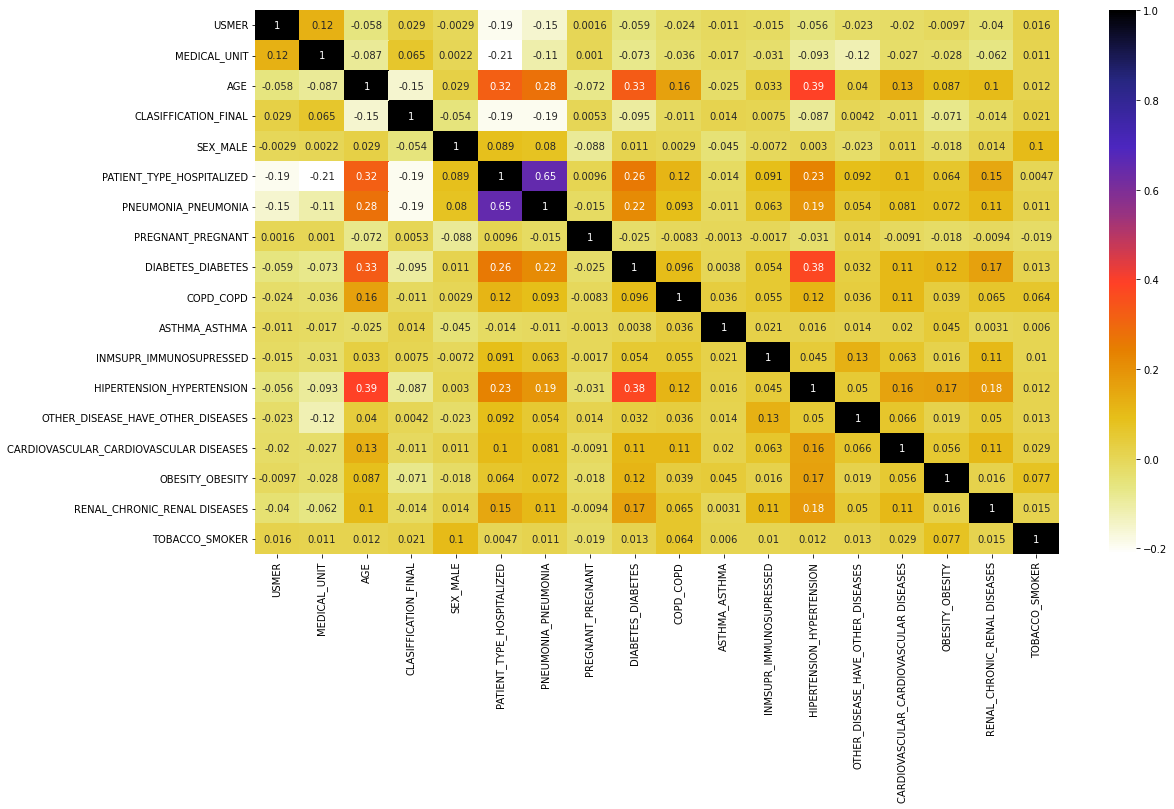

In [ ]:
#Using pearson correlation
plt.figure(figsize = (18,10))
cor = merge.corr()
sns.heatmap(cor, annot= True, cmap= plt.cm.CMRmap_r)
plt.show()

In [ ]:
drop_columns = ['COPD_COPD','ASTHMA_ASTHMA','INMSUPR_IMMUNOSUPRESSED','OTHER_DISEASE_HAVE_OTHER_DISEASES','CARDIOVASCULAR_CARDIOVASCULAR DISEASES','RENAL_CHRONIC_RENAL DISEASES','PREGNANT_PREGNANT','PATIENT_TYPE_HOSPITALIZED','HIPERTENSION_HYPERTENSION']
merge.drop(columns = drop_columns, inplace = True)

In [ ]:
merge.shape

(1021977, 9)

In [ ]:
merge['CLASIFFICATION_FINAL'] = merge['CLASIFFICATION_FINAL'] - 1

In [ ]:
x = merge.drop("CLASIFFICATION_FINAL", axis = 1)
y = merge["CLASIFFICATION_FINAL"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
y_pred1 = cross_val_predict(dt, x, y, cv= 5)
conf_mat1 = confusion_matrix(y, y_pred1)

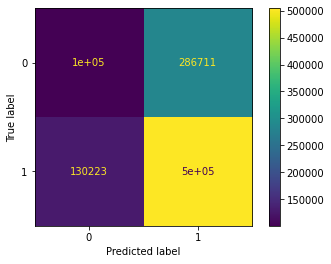

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_mat1)
disp = disp.plot()

In [ ]:
print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

           0       0.44      0.26      0.33    387596
           1       0.64      0.79      0.71    634381

    accuracy                           0.59   1021977
   macro avg       0.54      0.53      0.52   1021977
weighted avg       0.56      0.59      0.56   1021977



In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred2 = cross_val_predict(rf, x, y, cv= 5)
conf_mat2 = confusion_matrix(y, y_pred2)

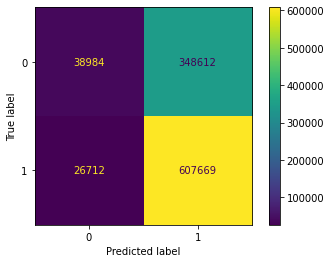

In [ ]:
disp = ConfusionMatrixDisplay(conf_mat2)
disp = disp.plot()

In [ ]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.10      0.17    387596
           1       0.64      0.96      0.76    634381

    accuracy                           0.63   1021977
   macro avg       0.61      0.53      0.47   1021977
weighted avg       0.62      0.63      0.54   1021977



In [ ]:
xgb = XGBClassifier(n_estimators = 200, 
                    learning_rate=0.1)

y_pred3 = cross_val_predict(xgb, x, y, cv= 5)
conf_mat3 = confusion_matrix(y, y_pred3)

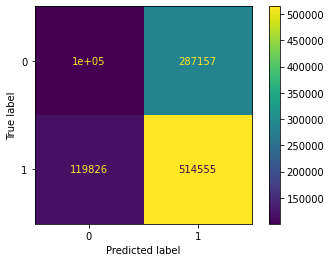

In [ ]:
disp = ConfusionMatrixDisplay(conf_mat3)
disp = disp.plot()

In [ ]:
print(classification_report(y, y_pred3))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33    387596
           1       0.64      0.81      0.72    634381

    accuracy                           0.60   1021977
   macro avg       0.55      0.54      0.52   1021977
weighted avg       0.57      0.60      0.57   1021977

